我们这节教程用 CIFAR10 图像分类作为例子，讲解 fastai 中 ConvLearner 的用法。如果对 fastai 还不熟悉，可以参考下面两篇教程，文末有本文代码的 jupyter notebook 供大家自己测试。

- [fastai 系列教程（一）- 安装)](https://www.pytorchtutorial.com/fastai-tutorial-1-installation/)
- [fastai 系列教程（二）- 快速入门 MNIST 示例](https://www.pytorchtutorial.com/fastai-tutorial-2-overview-mnist/)

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

### 导入必须包

In [2]:
from fastai import *
from fastai.vision import *
from fastai.vision.models.wrn import wrn_22
from fastai.docs import *

### 下载 CIFAR10

In [ ]:
# 我已经下载过了，就不再下载了
untar_data(CIFAR_PATH)

In [3]:
CIFAR_PATH

PosixPath('../data/cifar10')

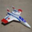

In [4]:
img = open_image('../data/cifar10/train/airplane/30_airplane.png')
img

### 图像增广

In [5]:
ds_tfms = ([*rand_pad(4, 32), flip_lr(p=0.5)], [])

### 图像读取

In [6]:
data = image_data_from_folder(CIFAR_PATH, valid='test', ds_tfms=ds_tfms, tfms=cifar_norm, bs=512)

### 定义 Learner 和训练

In [7]:
learn = Learner(data, wrn_22(), metrics=accuracy).to_fp16()  # WideResNet

In [ ]:
learn.fit_one_cycle(30, 3e-3, wd=0.4, div_factor=10, pct_start=0.5)

谢谢大家，[PyTorch 中文网](https://www.pytorchtutorial.com)整理发布。